In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\subho\OneDrive\Desktop\Courses\New folder\Project_2_Wix_Portfolio\movies.csv')

In [4]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
# We need to see if we have any missing data
# Let's look through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [21]:
# Fill NaN values with 0
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

# Change data type of columns
df['budget'] = df['budget'].astype(np.int64)
df['gross'] = df['gross'].astype(np.int64)

# Create correct year column
df['year_correct'] = df['released'].astype(str).str[:4]

# Order our Data a little bit to see
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [26]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,Walker,R,Biography,1987,"December 4, 1987 (United States)",6.6,3300.0,Alex Cox,Rudy Wurlitzer,Ed Harris,United States,5800000,0,In-Cine Compañía Industrial Cinematográfica,94.0,Dece
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400.0,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,NaN,86.0,Apri
1192,White of the Eye,R,Horror,1987,"June 19, 1987 (United Kingdom)",6.2,2200.0,Donald Cammell,China Kong,David Keith,United Kingdom,0,0,Mrs. White's Productions,110.0,June
1184,Creepozoids,R,Horror,1987,"October 2, 1987 (United States)",4.0,2100.0,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,0,Titan Productions,72.0,Octo


<Axes: >

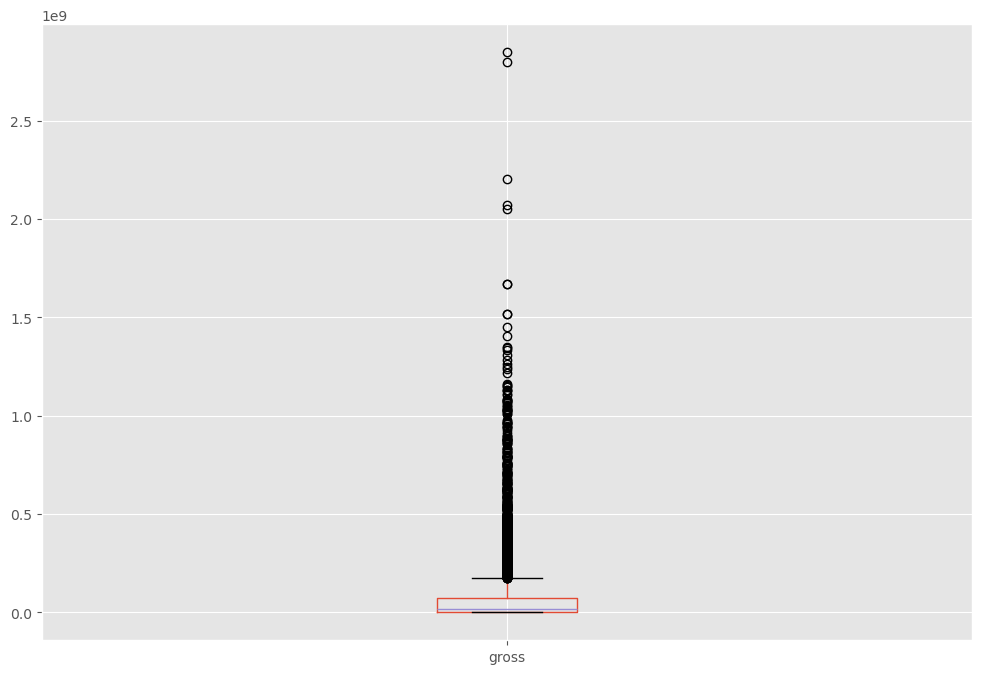

In [63]:
# Now to check for Outliers.
df.boxplot(column=['gross'])

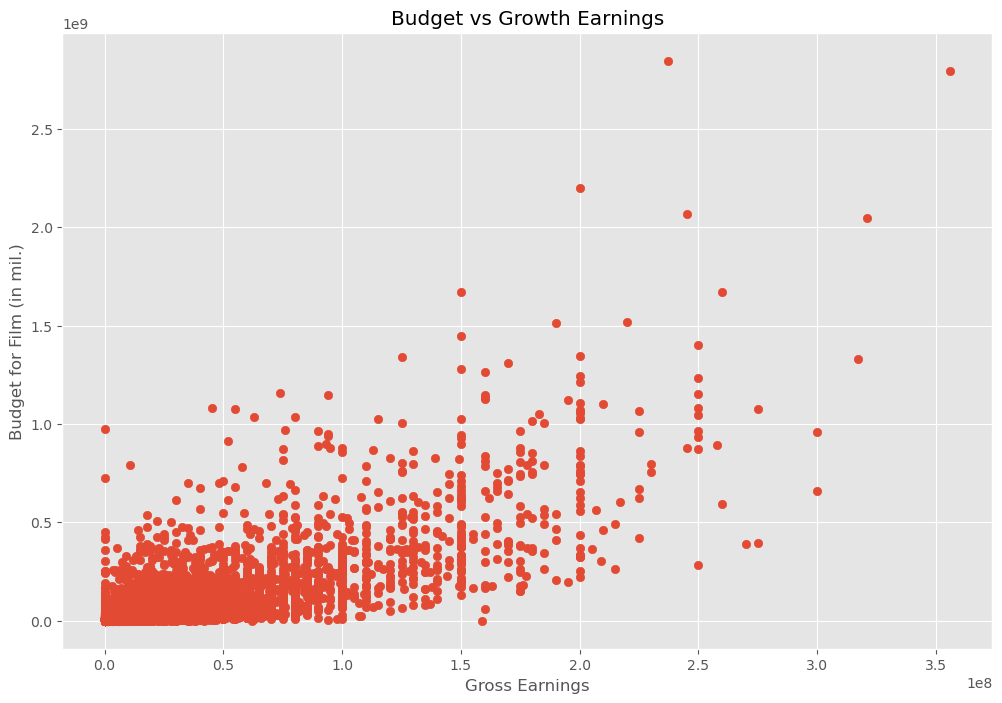

In [32]:
# Budget Correlation
# Company Correlation
# Scatter Plot with Budget vs Gross

plt.scatter(x=df['budget'] , y=df['gross'])
plt.title('Budget vs Growth Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film (in mil.)')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

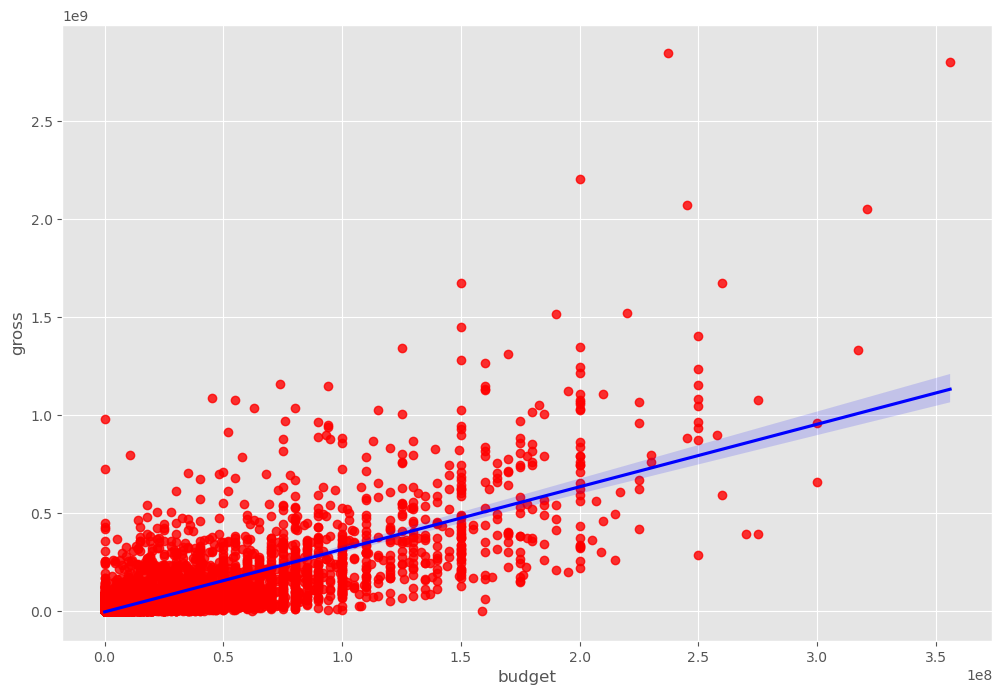

In [34]:
# We do a regression plot as from the scatter plot it is not distinctly clear if there is a direct correlation between the budget vs earnings.

sns.regplot(x='budget' , y='gross' , data=df, scatter_kws={"color" : "red"} , line_kws={"color" : "blue"})

In [41]:
# Let's start looking at the correlation.
# We take numerical columns num_col to look at the correlation.

num_col = ['budget' , 'gross' , 'runtime' , 'score' , 'votes' , 'year']
df[num_col].corr(method = 'pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.269510,0.055665,0.486862,0.309212
gross,0.750157,1.000000,0.245235,0.186392,0.632834,0.261900
runtime,0.269510,0.245235,1.000000,0.399451,0.309212,0.120811
score,0.055665,0.186392,0.399451,1.000000,0.409182,0.097995
votes,0.486862,0.632834,0.309212,0.409182,1.000000,0.222945
year,0.309212,0.261900,0.120811,0.097995,0.222945,1.000000


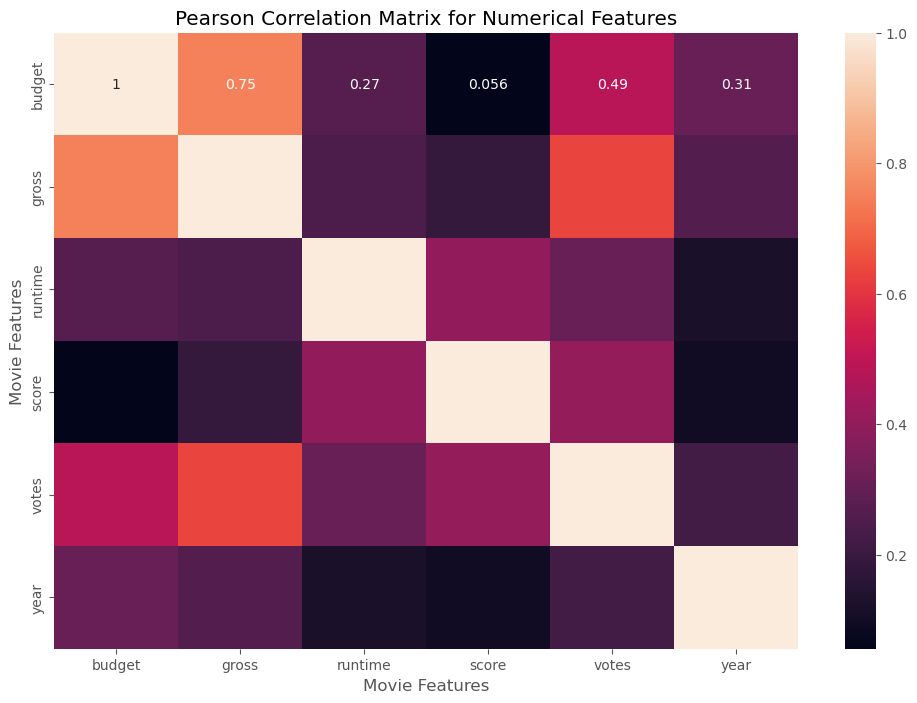

In [52]:
# High Correlation between budget & Gross.
# Now I'll use colours to highlight correlation_matrix corr_mat.

pearson_corr_mat = df[num_col].corr(method = 'pearson')
sns.heatmap(pearson_corr_mat, annot=True)
plt.title('Pearson Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [42]:
df[num_col].corr(method = 'kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.541956,0.176016,-0.005194,0.439902,0.209304
gross,0.541956,1.000000,0.176912,0.090626,0.560118,0.216595
runtime,0.176016,0.176912,1.000000,0.283611,0.198240,0.097184
score,-0.005194,0.090626,0.283611,1.000000,0.300115,0.067652
votes,0.439902,0.560118,0.198240,0.300115,1.000000,0.331465
year,0.209304,0.216595,0.097184,0.067652,0.331465,1.000000


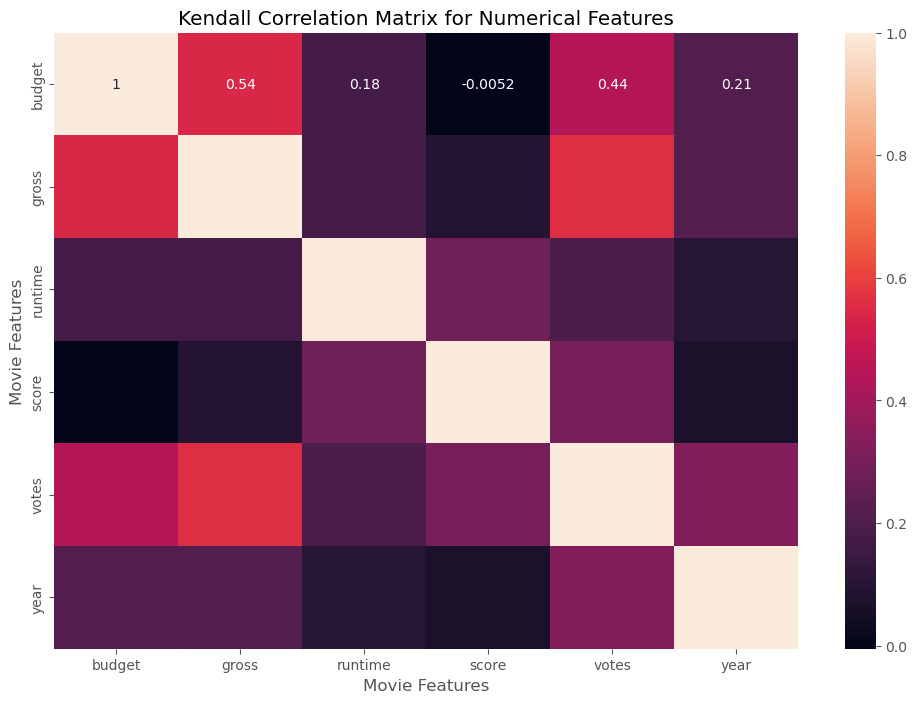

In [53]:
kendall_corr_mat = df[num_col].corr(method = 'kendall')
sns.heatmap(kendall_corr_mat, annot = True)
plt.title('Kendall Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [43]:
df[num_col].corr(method = 'spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.716816,0.246748,-0.007500,0.604627,0.291152
gross,0.716816,1.000000,0.256783,0.132569,0.752265,0.314681
runtime,0.246748,0.256783,1.000000,0.399857,0.290159,0.142977
score,-0.007500,0.132569,0.399857,1.000000,0.428138,0.099045
votes,0.604627,0.752265,0.290159,0.428138,1.000000,0.469829
year,0.291152,0.314681,0.142977,0.099045,0.469829,1.000000


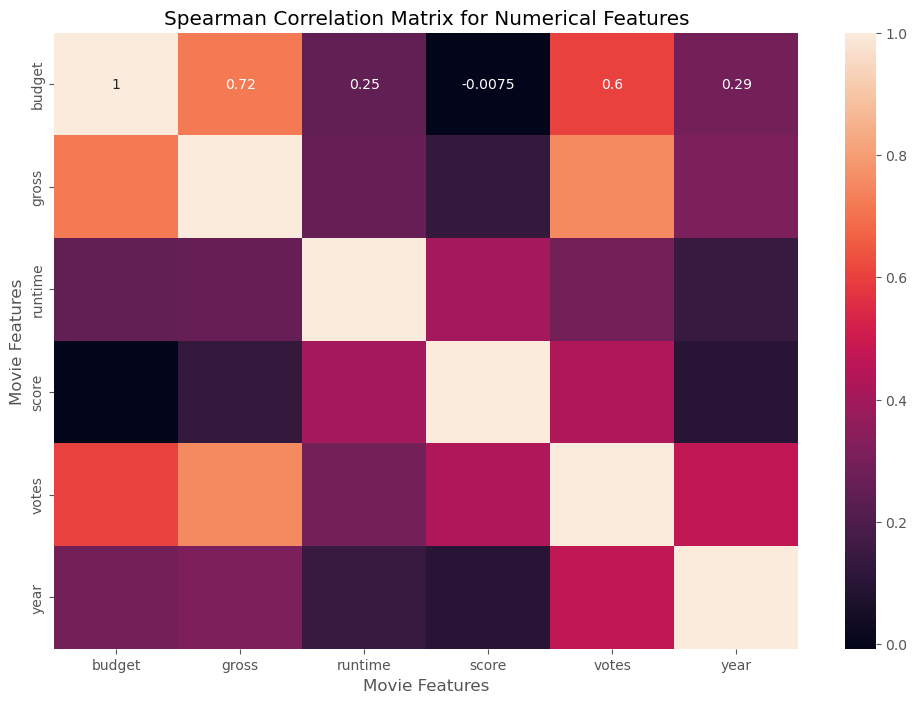

In [54]:
spearman_corr_mat = df[num_col].corr(method = 'spearman')
sns.heatmap(spearman_corr_mat, annot = True)
plt.title('Spearman Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [67]:
sorted_unstacked_pairs = spearman_corr_mat.unstack().sort_values(ascending=False)
sorted_unstacked_pairs

budget   budget     1.000000
gross    gross      1.000000
votes    votes      1.000000
score    score      1.000000
runtime  runtime    1.000000
year     year       1.000000
gross    votes      0.752265
votes    gross      0.752265
gross    budget     0.716816
budget   gross      0.716816
votes    budget     0.604627
budget   votes      0.604627
votes    year       0.469829
year     votes      0.469829
votes    score      0.428138
score    votes      0.428138
         runtime    0.399857
runtime  score      0.399857
gross    year       0.314681
year     gross      0.314681
budget   year       0.291152
year     budget     0.291152
runtime  votes      0.290159
votes    runtime    0.290159
gross    runtime    0.256783
runtime  gross      0.256783
         budget     0.246748
budget   runtime    0.246748
year     runtime    0.142977
runtime  year       0.142977
gross    score      0.132569
score    gross      0.132569
         year       0.099045
year     score      0.099045
budget   score

In [68]:
high_positive_corr = sorted_unstacked_pairs[(sorted_unstacked_pairs) > 0.5]
high_positive_corr

budget   budget     1.000000
gross    gross      1.000000
votes    votes      1.000000
score    score      1.000000
runtime  runtime    1.000000
year     year       1.000000
gross    votes      0.752265
votes    gross      0.752265
gross    budget     0.716816
budget   gross      0.716816
votes    budget     0.604627
budget   votes      0.604627
dtype: float64

In [69]:
high_negative_corr = sorted_unstacked_pairs[(sorted_unstacked_pairs) < 0]
high_negative_corr

budget  score    -0.0075
score   budget   -0.0075
dtype: float64

In [ ]:
# Summary of conclusions:

# [Gross & Votes], [Gross & Budget], [Votes & Budget] have highest, second highest and third highest positive Correlation in the order they have been written in. 
# Budget & Score have a negative correlation.